## Best Practices for Data Preprocessing

#### Always Explore & Visualize Data First

In [16]:
# Task 1: Summary Statistics





# Task 2: Visualize Data Distribution





# Task 3: Checking for Null Values




## Handle Missing & Inconsistent Data Before Applying ML Models

In [17]:
# Task 4: Drop Missing Values





# Task 5: Fill Missing Values




# Task 6: Handling Outliers with Capping





## Choose the Right Scaling Method

In [18]:
# Task 7: Min-Max Scaling







# Task 8: Robust Scaling






# Task 9: MaxAbs Scaling






## Keep Track of Data Transformations for Reproducibility

In [19]:
# Task 10: Log Data Preprocessing Steps






# Task 11: Store Transformation Parameters






             Age        Salary
count   5.000000      6.000000
mean   35.000000  65000.000000
std     7.905694  11832.159566
min    25.000000  50000.000000
25%    30.000000  56250.000000
50%    35.000000  65000.000000
75%    40.000000  73750.000000
max    45.000000  80000.000000


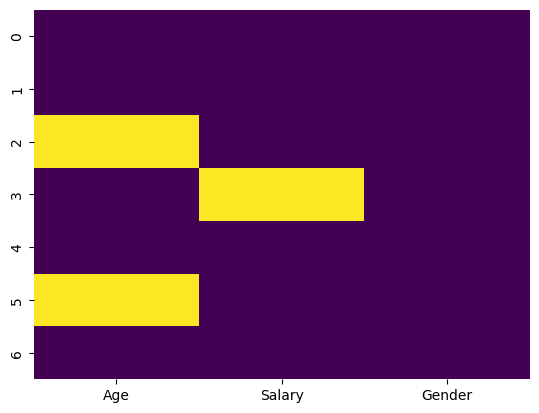

Preprocessed DataFrame:
       Age  Salary  Gender_Male
0 -1.67332    -1.5          1.0
1 -0.83666    -0.5          0.0
2  0.00000    -1.0          0.0
3  0.00000     0.0          1.0
4  0.83666     0.5          0.0
5  0.00000     1.0          1.0
6  1.67332     1.5          0.0


ValueError: A given column is not a column of the dataframe

In [20]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

# Step 1: Load the dataset
data = {
    'Age': [25, 30, np.nan, 35, 40, np.nan, 45],
    'Salary': [50000, 60000, 55000, np.nan, 70000, 75000, 80000],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female']
}

df = pd.DataFrame(data)

# Step 2: EDA (Exploratory Data Analysis)
def perform_eda(df):
    # Basic statistics and visualizations
    print(df.describe())
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.show()

perform_eda(df)

# Step 3: Handle Missing Values (Imputation)
def impute_data(df):
    # For numerical columns, we'll impute using the mean.
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    imputer = SimpleImputer(strategy='mean')
    df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
    return df

df = impute_data(df)

# Step 4: Handle Categorical Data (One Hot Encoding)
def encode_categorical(df):
    # Ensure 'Gender' column exists before encoding
    if 'Gender' in df.columns:
        one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Corrected argument name
        gender_encoded = one_hot_encoder.fit_transform(df[['Gender']])
        gender_encoded_df = pd.DataFrame(gender_encoded, columns=one_hot_encoder.get_feature_names_out(['Gender']))
        # Join the encoded columns back to the dataframe and drop 'Gender'
        df = df.join(gender_encoded_df).drop('Gender', axis=1)
    else:
        print("Gender column not found in DataFrame!")
    return df

df = encode_categorical(df)

# Step 5: Feature Scaling (Standardization)
def scale_features(df):
    # Only scale 'Age' and 'Salary'
    df[['Age', 'Salary']] = StandardScaler().fit_transform(df[['Age', 'Salary']])
    return df

df = scale_features(df)

# Step 6: Final DataFrame after preprocessing
print("Preprocessed DataFrame:")
print(df)

# Step 7: Create a pipeline for the entire process
# Define a pipeline that includes imputation, scaling, and encoding

# List the columns to apply each transformer
numerical_features = ['Age', 'Salary']
categorical_features = ['Gender']

# Define the transformations for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# For categorical data, use OneHotEncoder within ColumnTransformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False, drop='first'))  # OneHotEncoding
])

# Use ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 8: Define a complete pipeline with both preprocessing and a model (if needed)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Step 9: Train-test split for validation purposes (if needed for model training)
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Step 10: Fit the pipeline on the training data
pipeline.fit(X_train)

# Step 11: Check the transformed test data
transformed_test_data = pipeline.transform(X_test)
print("Transformed Test Data:")
print(transformed_test_data)

# Step 12: Feature selection and visualization (optional)
def feature_selection(df):
    # Visualize correlation heatmap
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True)
    plt.show()

feature_selection(df)

# Final output: Preprocessed DataFrame with scaling and encoding done
